<a href="https://colab.research.google.com/github/Mahmoudkhaled17/Minist-deeplearning/blob/main/minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
data = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
train_labels2 = to_categorical(train_labels)
test_labels2= to_categorical(test_labels)

In [4]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
model1=Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:

from tensorflow.keras.metrics import Recall,Precision,F1Score
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',Recall(),Precision(),F1Score()])


In [9]:
model1.fit(train_images,train_labels2,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8926 - f1_score: 0.8913 - loss: 0.3586 - precision: 0.9368 - recall: 0.8490 - val_accuracy: 0.9625 - val_f1_score: 0.9620 - val_loss: 0.1267 - val_precision: 0.9677 - val_recall: 0.9575
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9707 - f1_score: 0.9705 - loss: 0.0889 - precision: 0.9756 - recall: 0.9674 - val_accuracy: 0.9704 - val_f1_score: 0.9700 - val_loss: 0.1043 - val_precision: 0.9759 - val_recall: 0.9668
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9830 - f1_score: 0.9828 - loss: 0.0542 - precision: 0.9857 - recall: 0.9813 - val_accuracy: 0.9747 - val_f1_score: 0.9745 - val_loss: 0.0875 - val_precision: 0.9782 - val_recall: 0.9716
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9874 - f1_score: 0.9873 - loss: 0.0415 - precision: 0.9884 - recall: 0.9864 - val_accuracy: 0.9766 - val_f1_score: 0.9764 - val_loss: 0.0859 - val_precision: 0.9785 - va

In [10]:
from sklearn.metrics import confusion_matrix,classification_report

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

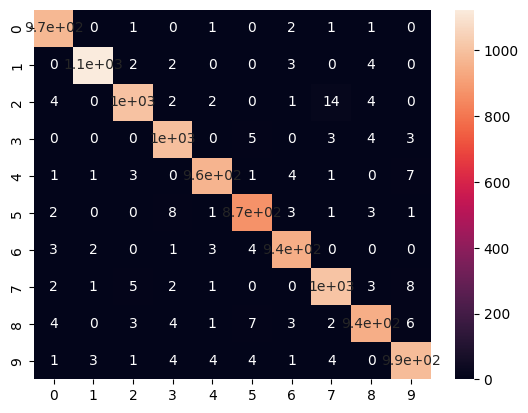

In [11]:
cor=confusion_matrix(test_labels2.argmax(axis=1),model1.predict(test_images).argmax(axis=1))
import seaborn as sns
sns.heatmap(cor,annot=True)

In [12]:
print(classification_report(test_labels2.argmax(axis=1),model1.predict(test_images).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [13]:
model2=Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
import tensorflow as tf
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Train the model
model2.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8921 - loss: 0.3628 - val_accuracy: 0.9689 - val_loss: 0.1020
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9731 - loss: 0.0873 - val_accuracy: 0.9669 - val_loss: 0.1025
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9826 - loss: 0.0541 - val_accuracy: 0.9755 - val_loss: 0.0860
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9877 - loss: 0.0365 - val_accuracy: 0.9774 - val_loss: 0.0884
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0294 - val_accuracy: 0.9737 - val_loss: 0.0979
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9774 - val_loss: 0.0928
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9774 - val_loss: 0.0988
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0172 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Axes: >

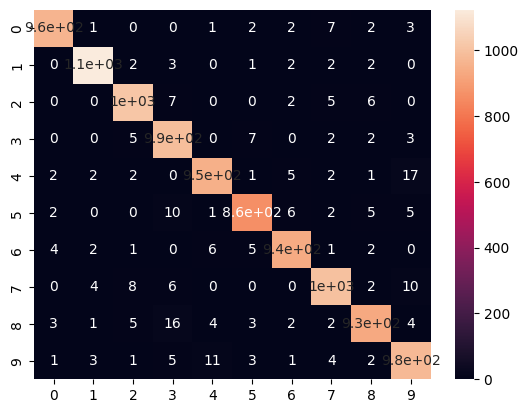

In [15]:
cor=confusion_matrix(test_labels,model2.predict(test_images).argmax(axis=1))
import seaborn as sns
sns.heatmap(cor,annot=True)

In [16]:
print(classification_report(test_labels,model2.predict(test_images).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [17]:
pred=model1.predict(test_images).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
import numpy as np
cond=pred==test_labels
v,c=np.unique(cond,return_counts=True)

In [19]:
print(f"the count of false= {c[0]}")

the count of false= 183


In [20]:
pred[cond==False],test_labels[cond==False]

(array([5, 4, 5, 2, 3, 7, 3, 5, 0, 7, 2, 7, 8, 6, 7, 3, 9, 8, 9, 9, 6, 7,
        7, 5, 5, 9, 4, 3, 5, 8, 6, 8, 5, 2, 6, 9, 5, 7, 7, 3, 3, 3, 4, 9,
        7, 6, 7, 7, 2, 2, 8, 2, 9, 3, 2, 9, 3, 7, 9, 0, 7, 9, 1, 6, 0, 0,
        8, 1, 0, 4, 3, 2, 0, 1, 3, 7, 5, 5, 5, 5, 2, 9, 7, 9, 5, 0, 9, 7,
        1, 4, 0, 3, 4, 8, 6, 8, 4, 4, 2, 6, 3, 6, 5, 1, 4, 0, 2, 3, 6, 2,
        8, 7, 7, 9, 8, 3, 3, 4, 7, 1, 3, 5, 0, 9, 3, 5, 5, 4, 4, 9, 6, 8,
        6, 8, 9, 8, 2, 0, 0, 8, 8, 3, 9, 9, 9, 3, 7, 9, 7, 7, 5, 5, 6, 9,
        6, 7, 7, 0, 9, 0, 8, 6, 6, 9, 3, 9, 2, 2, 5, 8, 4, 5, 7, 3, 6, 8,
        0, 0, 1, 3, 7, 0, 8]),
 array([9, 7, 8, 4, 9, 2, 5, 4, 6, 2, 8, 2, 1, 2, 2, 7, 4, 5, 7, 4, 8, 9,
        2, 8, 3, 8, 5, 1, 6, 7, 4, 7, 6, 7, 9, 4, 9, 2, 5, 8, 5, 2, 6, 7,
        8, 4, 2, 3, 4, 7, 2, 1, 8, 8, 7, 7, 5, 2, 7, 2, 3, 4, 6, 5, 8, 8,
        5, 9, 2, 2, 5, 8, 9, 6, 5, 4, 9, 3, 8, 8, 1, 5, 2, 8, 6, 6, 7, 3,
        9, 6, 5, 9, 8, 5, 4, 7, 2, 0, 9, 5, 1, 4, 3, 7, 9, 7, 0, 8, 8, 8,
       

In [21]:
arr=np.where(cond==False)[0]

IndexError: index 183 is out of bounds for axis 0 with size 183

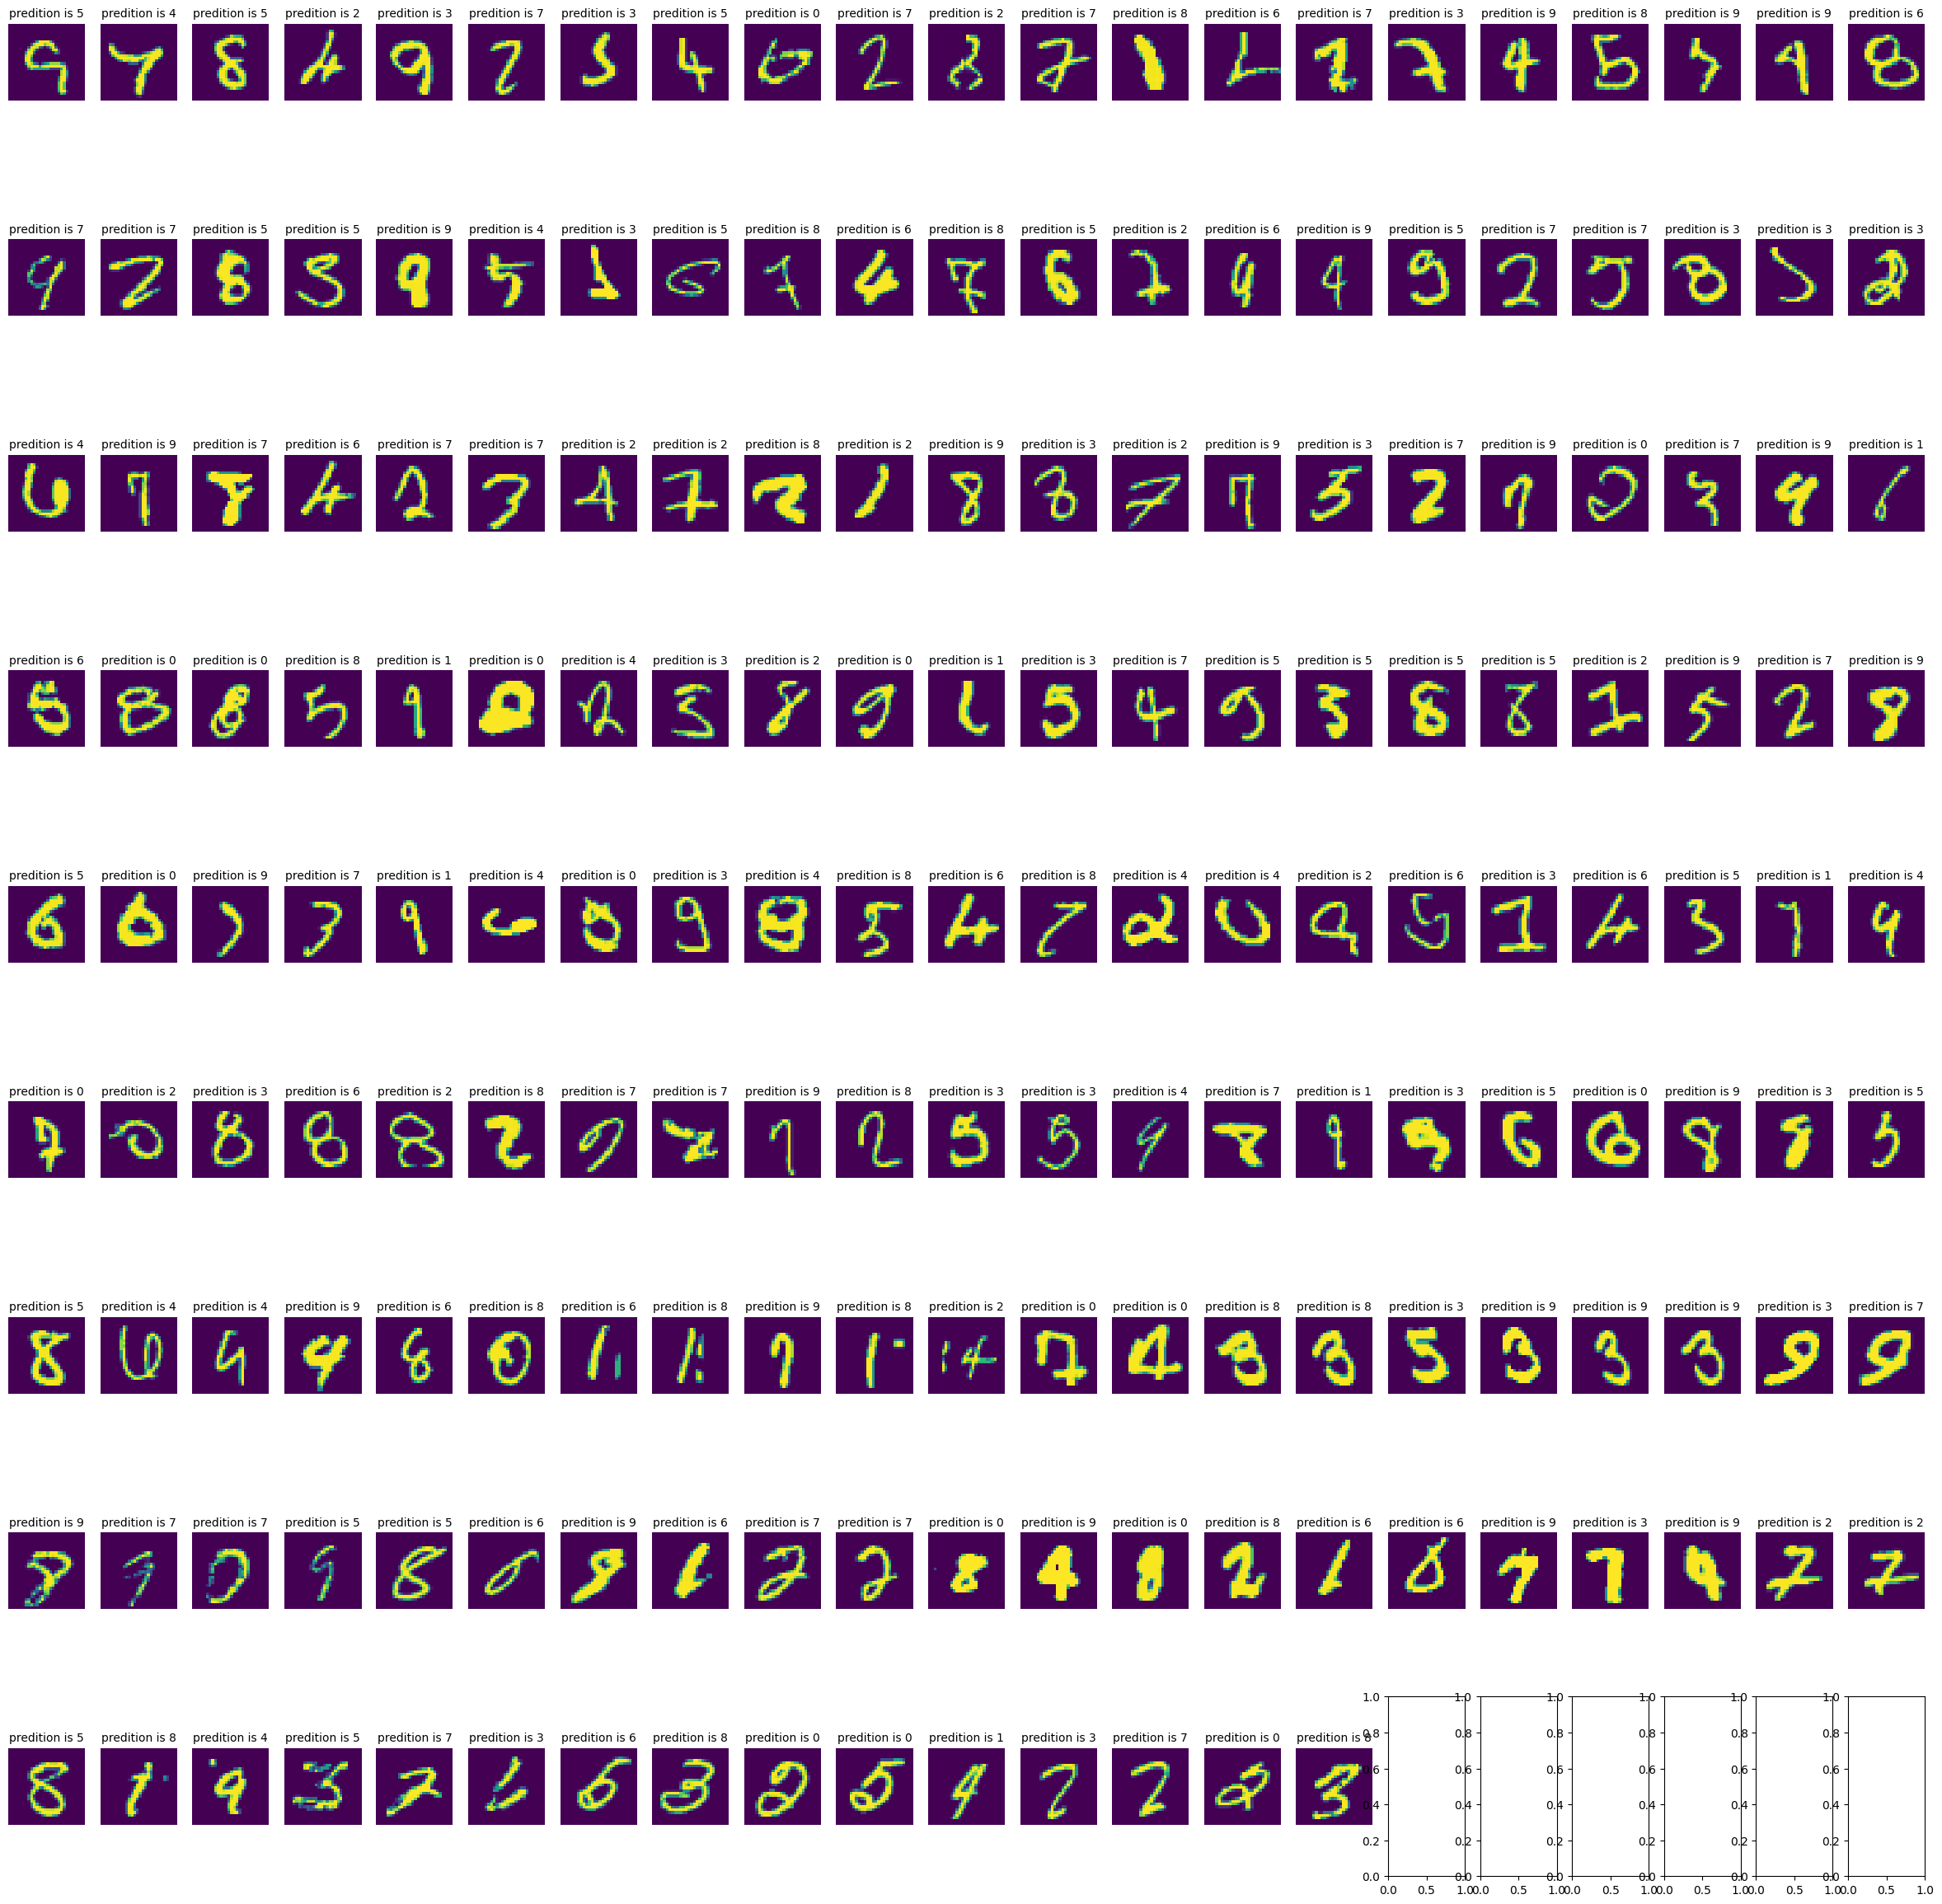

In [24]:
import matplotlib.pyplot as plt
mov=0
fig,axis=plt.subplots(9,int((c[0]/9)+1),figsize=(30,30))
for k in range(9):
  for x in range(int((c[0]/9))+1):
    axis[k,x].imshow(test_images[arr[mov]])
    axis[k,x].set_title(f"predition is {pred[arr[mov]]}",fontsize=10)
    axis[k,x].axis('off')
    mov+=1
